In [34]:
import math
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from matplotlib import style
%matplotlib inline


statevector_simulator = q.Aer.get_backend("statevector_simulator")
qasm_sim = q.Aer.get_backend("qasm_simulator")

def do_job(circuit):
    result = q.execute(circuit, backend=statevector_simulator).result()
    statevec = result.get_statevector()
    
    n_qubits = circuit.n_qubits
    
    circuit.measure([i for i in range(n_qubits)], [i for i in range(len(circuit.clbits))])
    qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
    counts = qasm_job.get_counts()
    return statevec, counts

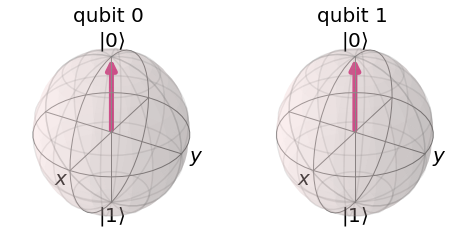

In [35]:
circuit = q.QuantumCircuit(2,2)
statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)


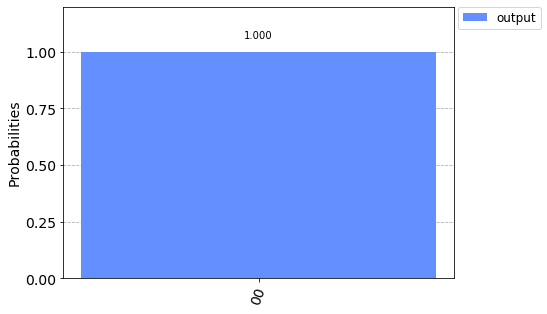

In [36]:
plot_histogram([counts], legend=["output"])

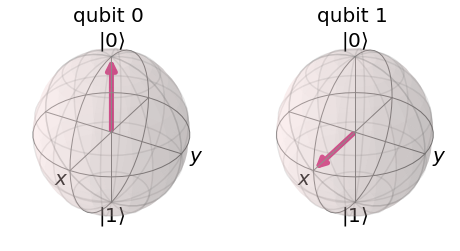

In [37]:
#Hadamard Gate
circuit = q.QuantumCircuit(2,2)
circuit.h(1)
statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)



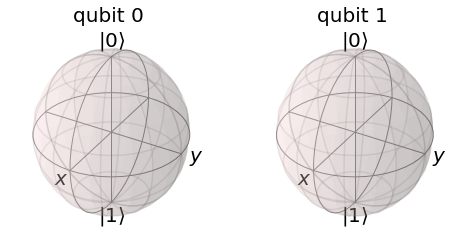

In [38]:
#Entangle Qubit 0 and 1 with cnot

circuit = q.QuantumCircuit(2,2)   
circuit.h(0)  
circuit.cx(0,1) 
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

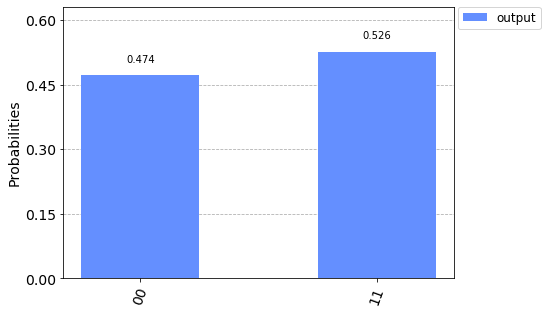

In [39]:
plot_histogram([counts], legend=['output'])


In [40]:
circuit = q.QuantumCircuit(3,3)   
circuit.h(0) 
circuit.h(1)
circuit.ccx(0,1,2)
circuit.draw()


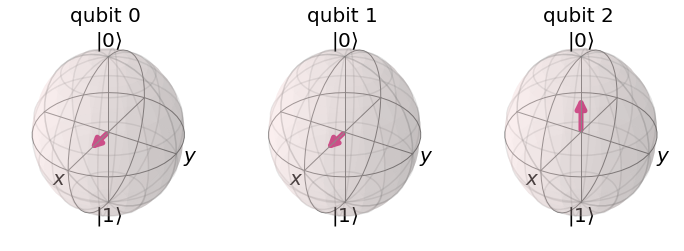

In [41]:
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)



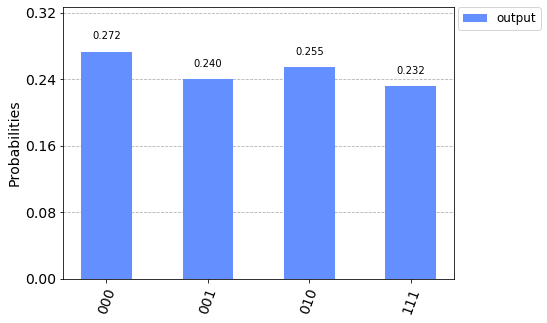

In [42]:
plot_histogram([counts], legend=['output']) 

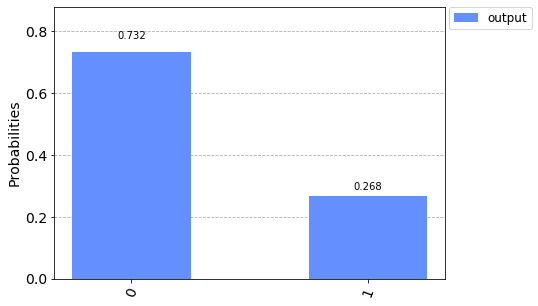

In [43]:
circuit = q.QuantumCircuit(3,1)   
circuit.h(0) 
circuit.h(1)
circuit.ccx(0,1,2)
circuit.measure([2], [0])
circuit.draw()
qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
counts = qasm_job.get_counts()
plot_histogram([counts], legend=["output"])

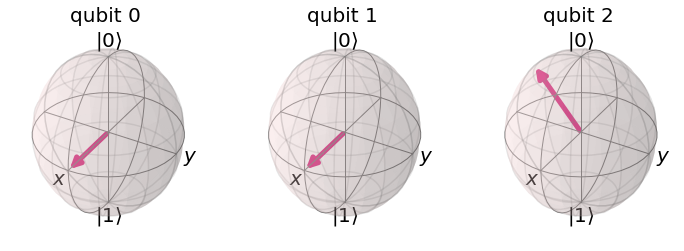

In [47]:
circuit = q.QuantumCircuit(3,3)   
circuit.h(0) 
circuit.h(1)
circuit.rx(math.pi/4 , 2) #rotate along x axis
#circuit.x(2)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

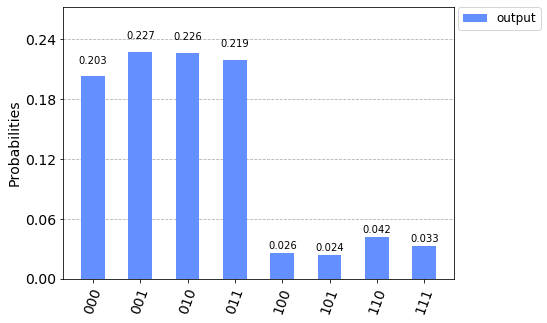

In [48]:
plot_histogram([counts], legend=["output"])



In [51]:
circuit = q.QuantumCircuit(3,1)   
circuit.h(0) 
circuit.h(1)
circuit.rx(math.pi/4 , 2) 
circuit.measure([2], [0])
circuit.draw()


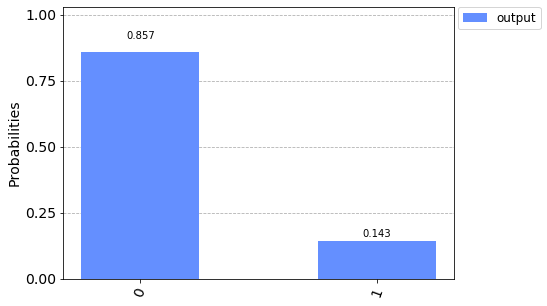

In [53]:
qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
counts = qasm_job.get_counts()
plot_histogram([counts], legend=["output"])